----
## Esercizio 6
----

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [34]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'

})

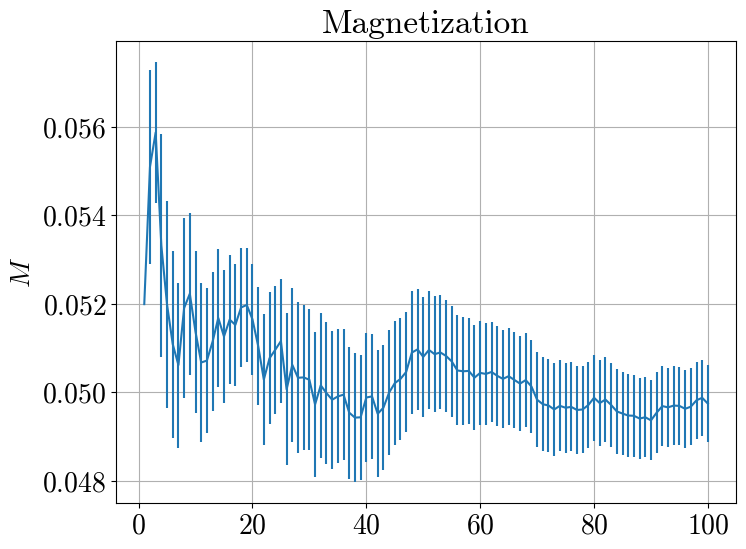

In [56]:

df_pres = pd.read_csv('magnetization.dat',sep='\t')
plt.errorbar(df_pres["#BLOCK:"],df_pres["M_AVE:"],df_pres["ERROR:"])
plt.title('Magnetization')
plt.ylabel('$M$')
plt.grid(True)
plt.show()

In [4]:
#df_pres.iloc[:,]

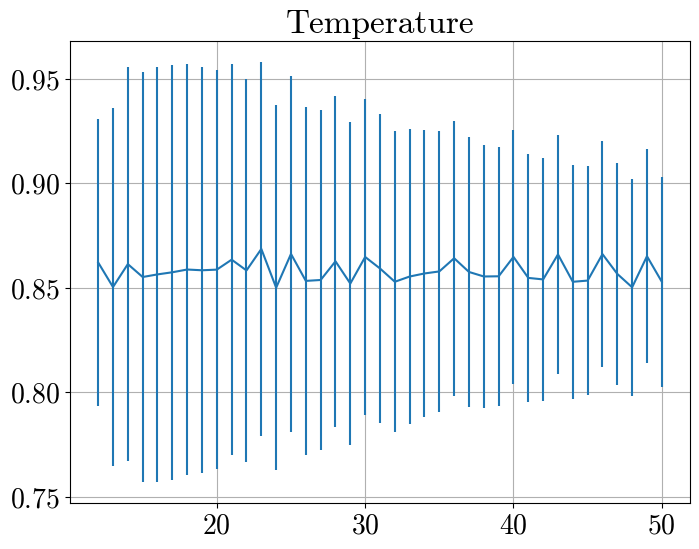

In [5]:
df_temp = pd.read_csv('Temperature.dat',sep='\t')
#x = np.arange(len(df_pres1))+1
#x*=1000
plt.errorbar(df_temp.iloc[:,1],df_temp.iloc[:,2],df_temp.iloc[:,4])
plt.title('Temperature')

#plt.xlabel('blocchi')
#plt.ylabel('$P$')
plt.grid(True)
plt.show()

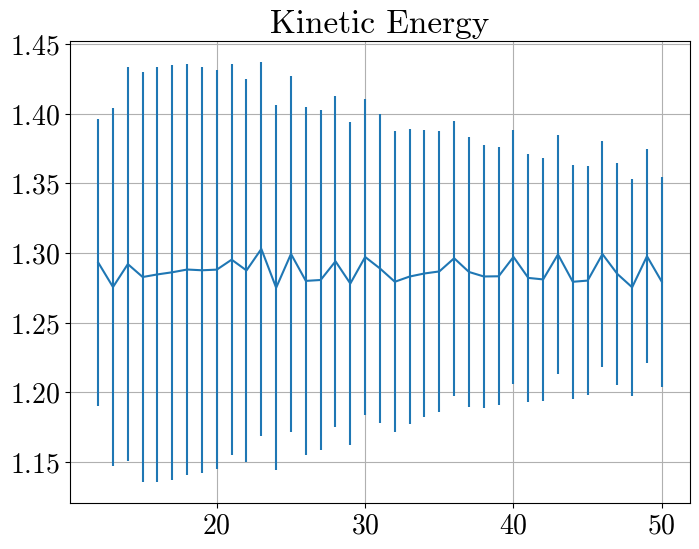

In [6]:
df_kin = pd.read_csv('kinetic_energy.dat',sep='\t')


#x = np.arange(len(df_kin))+1
#x*=1000
plt.errorbar(df_kin.iloc[:,1],df_kin.iloc[:,2],df_kin.iloc[:,4])
plt.title('Kinetic Energy')
#plt.xlabel('blocchi')
#plt.ylabel('$C$')
plt.grid(True)
plt.show()

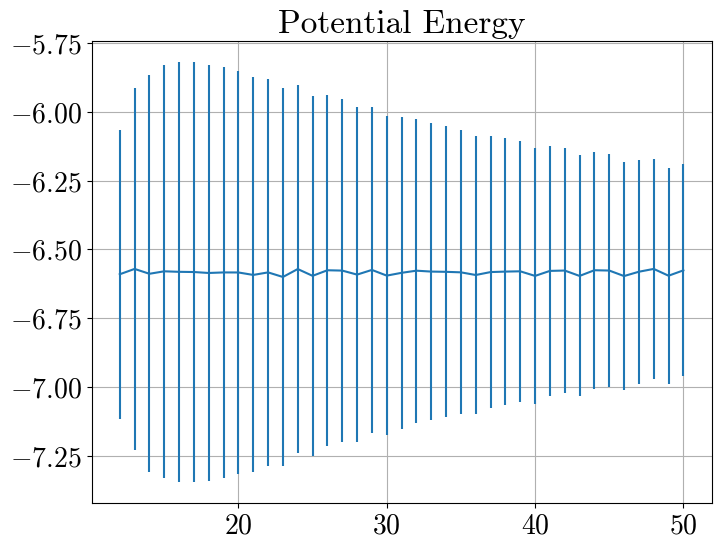

In [7]:
df_pot = pd.read_csv('potential_energy.dat',sep='\t')
#x = np.arange(len(df_pot))+1
#x*=1000
plt.errorbar(df_pot.iloc[:,1],df_pot.iloc[:,2],df_pot.iloc[:,4])
plt.title('Potential Energy')
#plt.xlabel('blocchi')
#plt.ylabel('$C$')
plt.grid(True)
plt.show()

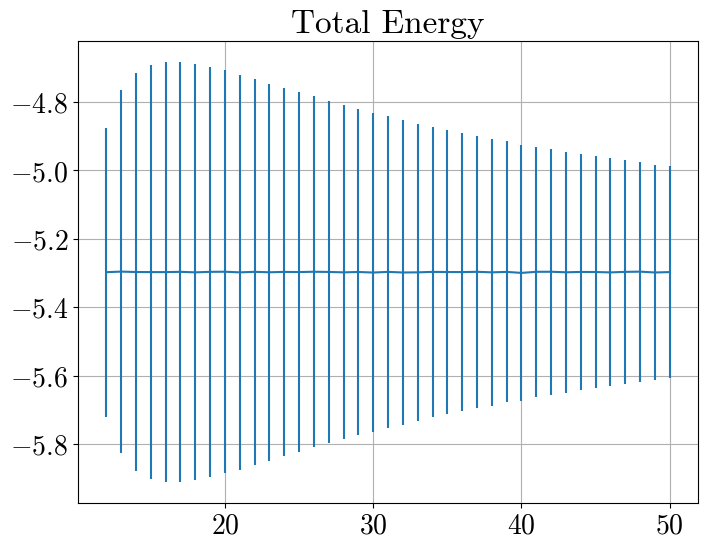

In [8]:
df_eng = pd.read_csv('total_energy.dat',sep='\t')

plt.errorbar(df_eng.iloc[:,1],df_eng.iloc[:,2],df_eng.iloc[:,4])
plt.title('Total Energy')
plt.grid(True)
plt.show()

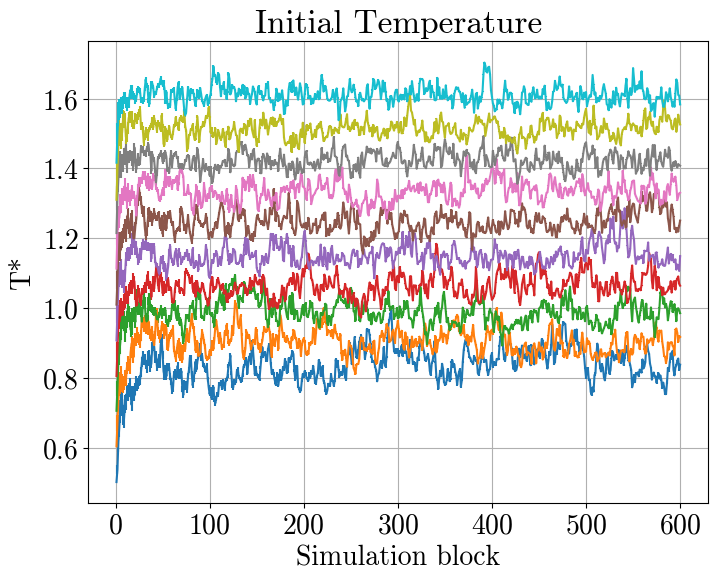

In [14]:
n=10
abc=np.zeros((n,9))
x1=np.zeros(n)
    
for i in range(0,n):
    dt = pd.read_csv('Gas/temperature_'+str(i)+'.dat',sep='\t')
    x1[i]=0.5+0.1*i
    plt.errorbar(dt.iloc[:,1],dt.iloc[:,2],dt.iloc[:,4],label=str(i+1))
    for j in range(0,9):
        x = dt.iloc[(j+1)*60:600,1]
        ab = np.polyfit(x,dt.iloc[(j+1)*60:600,2],0)
        abc[i,j] = ab[0]
    #plt.plot(x,abc[i,0]*x/x)
    #print(x1[i],'\t',abc[i],'\t',abc[i]-x1[i])

#plt.legend()
plt.ylabel('T*')
plt.xlabel('Simulation block')
plt.title('Initial Temperature')
plt.grid(True)
plt.show()

In [10]:
np.arange(1,9)

array([1, 2, 3, 4, 5, 6, 7, 8])

Text(0.5, 1.0, 'Mean Temperature from x-th to 100-th block')

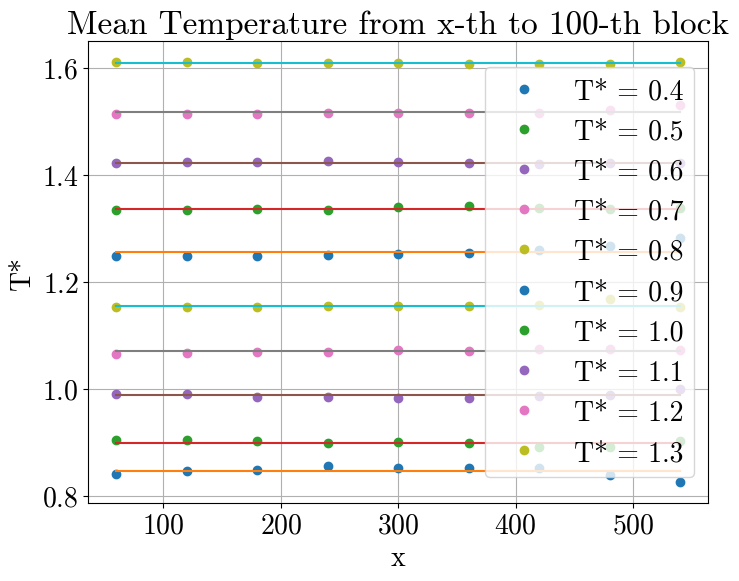

In [15]:
b=np.arange(1,10)*60
ber=np.zeros(10)
for i in range(0,10):
    plt.plot(b,abc[i,:],'o',label='T* = '+str(int(4+1*i)/10))
    a=np.polyfit(b,abc[i,:],0)
    ber[i]=a[0]
    plt.plot(b,ber[i]*b/b)
plt.grid()
plt.xlabel('x')
plt.ylabel('T*')
plt.legend(loc='center right')
plt.title('Mean Temperature from x-th to 100-th block')

[0.86432896 0.38920848]


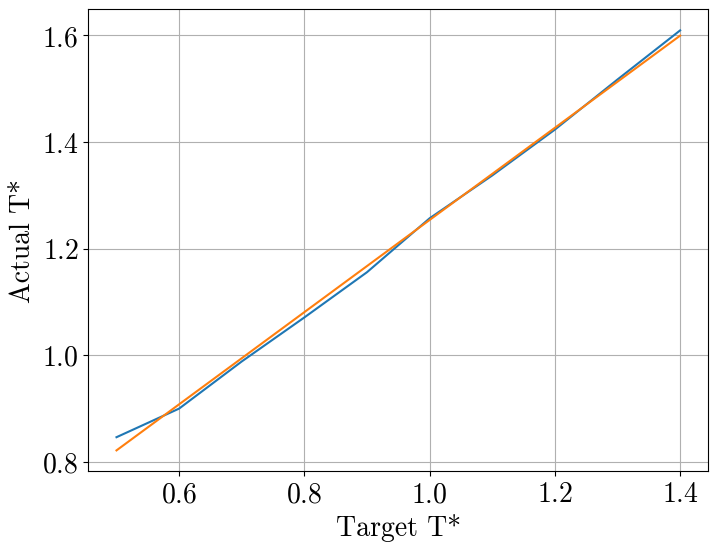

In [16]:
plt.plot(x1,ber)
gen=np.polyfit(x1,ber,1)
plt.plot(x1,gen[0]*x1+gen[1])
plt.grid()
plt.xlabel('Target T*')
plt.ylabel('Actual T*')
print(gen)

In [13]:
(1.2-gen[1])/gen[0]

2.376125277694086